In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32


In [ ]:
!git clone https://github.com/Achyut2022/Emotion-Detection-Using-Facial-Expression.git


Cloning into 'Emotion-Detection-Using-Facial-Expression'...
remote: Enumerating objects: 34059, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34059 (delta 0), reused 3 (delta 0), pack-reused 34053
Receiving objects: 100% (34059/34059), 52.51 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35889/35889), done.


In [ ]:
train_data_dir='/content/Emotion-Detection-Using-Facial-Expression/FER-2013/train'
validation_data_dir='/content/Emotion-Detection-Using-Facial-Expression/FER-2013/train'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


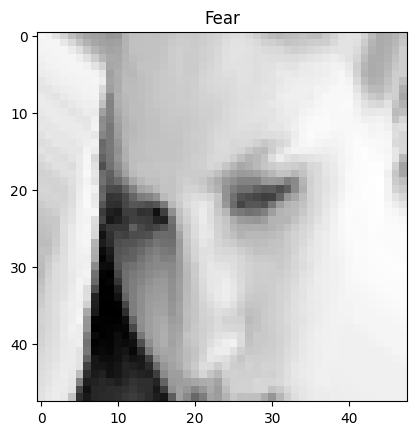

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()


import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [ ]:
train_path = "/content/Emotion-Detection-Using-Facial-Expression/FER-2013/train"
test_path = "/content/Emotion-Detection-Using-Facial-Expression/FER-2013/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=75

In [ ]:

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('/content/Emotion-Detection-Using-Facial-Expression/FER-2013/model.h5')

Epoch 1/75
897/897 [==============================] - 45s 43ms/step - loss: 1.7815 - accuracy: 0.2641 - val_loss: 1.7005 - val_accuracy: 0.3200
Epoch 2/75
897/897 [==============================] - 31s 35ms/step - loss: 1.6669 - accuracy: 0.3332 - val_loss: 1.5296 - val_accuracy: 0.4134
Epoch 3/75
897/897 [==============================] - 29s 32ms/step - loss: 1.5316 - accuracy: 0.4014 - val_loss: 1.4113 - val_accuracy: 0.4526
Epoch 4/75
897/897 [==============================] - 31s 34ms/step - loss: 1.4410 - accuracy: 0.4422 - val_loss: 1.2714 - val_accuracy: 0.5099
Epoch 5/75
897/897 [==============================] - 27s 30ms/step - loss: 1.3813 - accuracy: 0.4720 - val_loss: 1.2454 - val_accuracy: 0.5163
Epoch 6/75
897/897 [==============================] - 29s 32ms/step - loss: 1.3421 - accuracy: 0.4873 - val_loss: 1.1679 - val_accuracy: 0.5516
Epoch 7/75
897/897 [==============================] - 28s 31ms/step - loss: 1.3132 - accuracy: 0.4971 - val_loss: 1.1702 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model


#Test the model
my_model = load_model('/content/Emotion-Detection-Using-Facial-Expression/FER-2013/model.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

1/1 [==============================] - 8s 8s/step


Accuracy =  0.71875


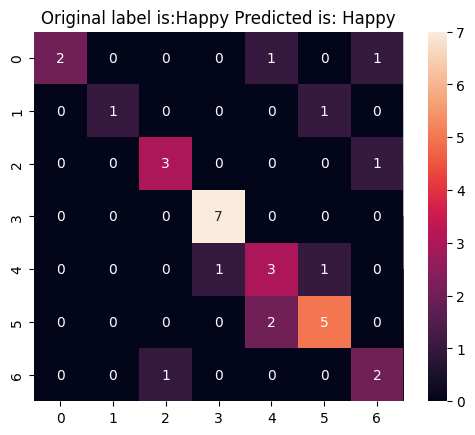

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()